In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read in a csv file using pandas
df = pd.read_csv('/content/drive/MyDrive/Data 598/marathon_results_2015.csv')


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26593,26593,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,NaN,MI,0:50:15,1:43:31,2:36:53,3:32:26,3:43:46,4:25:53,5:19:44,6:17:19,7:13:34,0:17:31,-,7:38:56,26594,12015,269
26594,26594,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,NaN,NaN,0:48:36,1:39:39,2:39:13,3:35:58,3:47:55,4:32:44,5:31:58,6:28:56,7:26:19,0:17:59,-,7:51:30,26595,12016,270
26595,26595,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,NaN,NaN,0:53:03,1:47:16,2:41:45,3:37:07,3:48:21,4:33:51,5:38:56,6:38:51,7:36:18,0:18:18,-,7:59:33,26596,12017,91
26596,26596,29396,"Buccilli, Alfred P.",53,M,Lynnfield,MA,USA,NaN,NaN,0:49:04,1:40:12,2:33:31,3:31:41,3:43:35,4:29:20,5:31:11,6:33:35,7:35:38,0:18:20,-,8:00:37,26597,14580,2055


In [6]:
# let's import a dataframe from the seaborn package
import seaborn as sns

df = sns.load_dataset('diamonds')

# if you don't have seaborn you can use the following command to pull in the same data
#df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

# see the first few rows
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [8]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=53940, step=1)

In [10]:
len(df)

53940

In [11]:
df.shape

(53940, 10)

In [12]:
#gives numeric statistcal overview
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [14]:
# we can create a dataframe from scratch in multiple ways

# here's a dictionary where the dictionary keys are the column names
# and the dictionary values are the column values

# what do you notice here about the output?
pd.DataFrame({
                "A": 1.0,
                "B": pd.Timestamp("20130102"),
                "C": pd.Series(1, index=list(range(4)), dtype="float32"),
                "D": np.array([3] * 4, dtype="int32"),
                "E": pd.Categorical(["test", "train", "test", "train"]),
                "F": "foo",
                })

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [15]:
# here's my favorite way

# a list of rows
rows = []

colors = ['red', 'blue', 'green']

for idx in range(5):
    new_dict = dict()
    new_dict['Student_Id'] = idx
    new_dict['Student Name'] = f'John{idx}'
    new_dict['Favorite Color'] = colors[idx % 3]
    
    # each row is a dictionary where the keys are the column names
    # and the values are the row values
    rows.append(new_dict)
    
pd.DataFrame(rows)

,Student_Id,Student Name,Favorite Color
0,0,John0,red
1,1,John1,blue
2,2,John2,green
3,3,John3,red
4,4,John4,blue


In [16]:
# select a column
df['carat']

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

In [17]:
type(df['carat'])

pandas.core.series.Series

In [18]:
# can slice like a list
df[4:10]

,carat,cut,color,clarity,depth,table,price,x,y,z
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [19]:
# can pass lists to loc
df.loc[[1, 3, 5]]

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [20]:
# can also use to slice
df.loc[10:15]

,carat,cut,color,clarity,depth,table,price,x,y,z
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68


In [21]:
# the method .iloc uses position
df.iloc[10:15, 0:3]

,carat,cut,color
10,0.30,Good,J
11,0.23,Ideal,J
12,0.22,Premium,F
13,0.31,Ideal,J
14,0.20,Premium,E


In [22]:
small_df = df.iloc[5:20]
# remember that these methods don't alter "df", but output a new DataFrame object
small_df

,carat,cut,color,clarity,depth,table,price,x,y,z
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


In [23]:
# Boolean indexing
df[ df['carat'] > 1.5]

,carat,cut,color,clarity,depth,table,price,x,y,z
2024,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
3926,1.51,Good,G,I1,64.0,59.0,3497,7.29,7.17,4.63
3955,1.52,Fair,H,I1,64.9,58.0,3504,7.18,7.13,4.65
4128,1.52,Premium,I,I1,61.2,58.0,3541,7.43,7.35,4.52
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


In [24]:
# what is going on here?
df['carat'] > 1.5

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: carat, Length: 53940, dtype: bool

In [25]:
df = pd.read_csv('/content/drive/MyDrive/Data 598/marathon_results_2015.csv')
df

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26593,26593,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,NaN,MI,0:50:15,1:43:31,2:36:53,3:32:26,3:43:46,4:25:53,5:19:44,6:17:19,7:13:34,0:17:31,-,7:38:56,26594,12015,269
26594,26594,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,NaN,NaN,0:48:36,1:39:39,2:39:13,3:35:58,3:47:55,4:32:44,5:31:58,6:28:56,7:26:19,0:17:59,-,7:51:30,26595,12016,270
26595,26595,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,NaN,NaN,0:53:03,1:47:16,2:41:45,3:37:07,3:48:21,4:33:51,5:38:56,6:38:51,7:36:18,0:18:18,-,7:59:33,26596,12017,91
26596,26596,29396,"Buccilli, Alfred P.",53,M,Lynnfield,MA,USA,NaN,NaN,0:49:04,1:40:12,2:33:31,3:31:41,3:43:35,4:29:20,5:31:11,6:33:35,7:35:38,0:18:20,-,8:00:37,26597,14580,2055


In [26]:
# is a value missing?
pd.isna(df.loc[0:10, ['Name']])

,Name
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [27]:
# apply to whole dataframe
df.isna()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26593,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26594,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26595,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26596,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
# sum each column
# remember that F = 0, T = 1
# what does the output mean?
df.isna().sum()

Unnamed: 0           0
Bib                  0
Name                 0
Age                  0
M/F                  0
City                 0
State             2551
Country              0
Citizen          25534
Unnamed: 9       26531
5K                   0
10K                  0
15K                  0
20K                  0
Half                 0
25K                  0
30K                  0
35K                  0
40K                  0
Pace                 0
Proj Time            0
Official Time        0
Overall              0
Gender               0
Division             0
dtype: int64

In [29]:
# drop rows with missing values
df.dropna(axis=0)

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division


In [30]:
# drop columns with missing values
df.dropna(axis=1)

,Unnamed: 0,Bib,Name,Age,M/F,City,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,ETH,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,ETH,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,KEN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,KEN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,KEN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26593,26593,25656,"Prescott, Francine J.",64,F,Boynton Beach,USA,0:50:15,1:43:31,2:36:53,3:32:26,3:43:46,4:25:53,5:19:44,6:17:19,7:13:34,0:17:31,-,7:38:56,26594,12015,269
26594,26594,31359,"Emerson, Annette C.",61,F,Old Town,USA,0:48:36,1:39:39,2:39:13,3:35:58,3:47:55,4:32:44,5:31:58,6:28:56,7:26:19,0:17:59,-,7:51:30,26595,12016,270
26595,26595,25559,"Cerveny, Nona",66,F,Scottsdale,USA,0:53:03,1:47:16,2:41:45,3:37:07,3:48:21,4:33:51,5:38:56,6:38:51,7:36:18,0:18:18,-,7:59:33,26596,12017,91
26596,26596,29396,"Buccilli, Alfred P.",53,M,Lynnfield,USA,0:49:04,1:40:12,2:33:31,3:31:41,3:43:35,4:29:20,5:31:11,6:33:35,7:35:38,0:18:20,-,8:00:37,26597,14580,2055


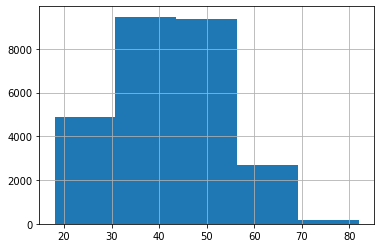

In [31]:
# nice built-in plotting functions
df['Age'].hist(bins=5)

In [32]:
# transform the data
df['M/F'].value_counts()

M    14581
F    12017
Name: M/F, dtype: int64

In [33]:
# mean of the Age, grouped by Country
df[['Country','Age']].groupby('Country').mean()

,Age
Country,
AHO,57.000000
AND,48.000000
ARG,46.294118
AUS,44.613636
AUT,47.857143
...,...
URU,25.000000
USA,41.317185
VEN,42.428571


In [34]:
df[['Country','Age']].groupby('Country', as_index=False).mean()

# if I now want to manipulate this dataframe I need to assign it to a variable name
age_avg = df[['Country','Age']].groupby('Country', as_index=False).mean()

# sort by average age!
age_avg.sort_values(by='Age')

,Country,Age
74,URU,25.000000
25,ETH,25.857143
8,BLR,27.000000
24,EST,29.500000
41,KEN,30.666667
...,...,...
70,TUR,51.333333
66,SVK,51.500000
40,JPN,53.691176
0,AHO,57.000000


In [35]:
x = np.array([1,2,3,4])
x

array([1, 2, 3, 4])

In [36]:
type(x)

numpy.ndarray

In [37]:
# most useful np.array method!
x.shape

(4,)

In [38]:
x = np.array([[1,2],[3,4],[5,6]])
x.shape

(3, 2)

In [39]:
# What is this doing?
x = np.random.randint(5, size=10)
x

array([0, 2, 1, 3, 1, 3, 0, 1, 2, 4])

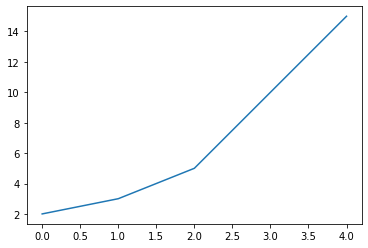

In [40]:
# a simple line chart
plt.plot([0,1,2,3,4], [2,3,5,10,15])

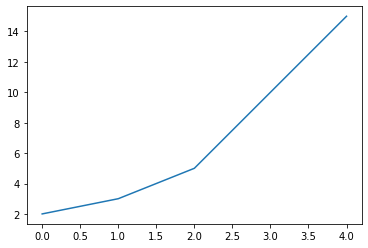

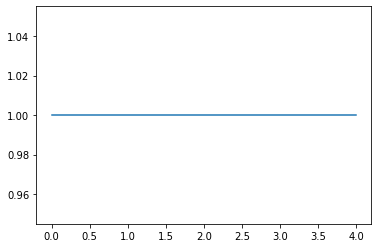

In [41]:
# better to use plt.show rather than "printing" the line chart
plt.plot([0,1,2,3,4], [2,3,5,10,15])
plt.show()
plt.plot([0,1,2,3,4], [1,1,1,1,1])
plt.show()

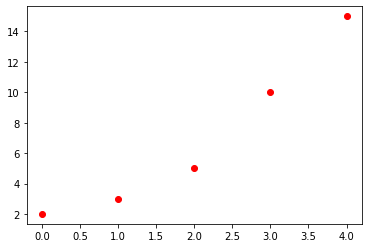

In [42]:
# scatter plot!
plt.plot([0,1,2,3,4], [2,3,5,10,15], 'ro')
plt.show()

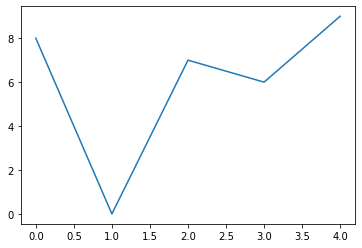

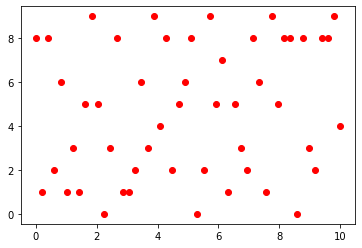

In [43]:
# plt takes in np arrays!
# np.arange(k) makes a sequence of k numbers
plt.plot(np.arange(5), np.random.randint(10, size=5))
plt.show()

start = 0
stop = 10
num_pts = 50
# linspace creates a sequence of points using a start, stop, and number of points option
plt.plot(np.linspace(start, stop, num_pts), np.random.randint(10, size=50), 'ro')
plt.show()

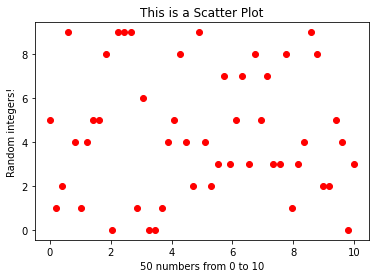

In [44]:
plt.plot(np.linspace(start, stop, num_pts), np.random.randint(10, size=50), 'ro')

# easy to format the graph!
plt.xlabel(f'{num_pts} numbers from {start} to {stop}')
plt.ylabel('Random integers!')
plt.title('This is a Scatter Plot')
plt.show()

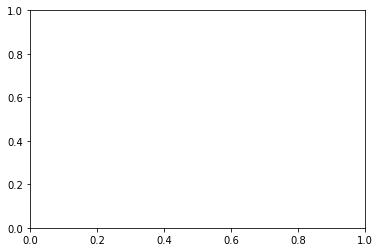

In [45]:
# create a figure and one subplot
fig, ax = plt.subplots()
plt.show()

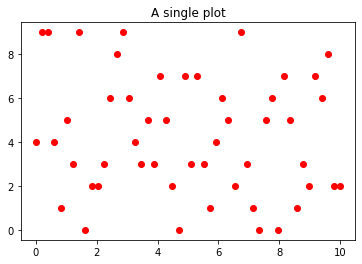

In [46]:
fig, ax = plt.subplots()

# populate the subplot
ax.plot(np.linspace(start, stop, num_pts), np.random.randint(10, size=50), 'ro')
ax.set_title('A single plot')

# show it
plt.show()

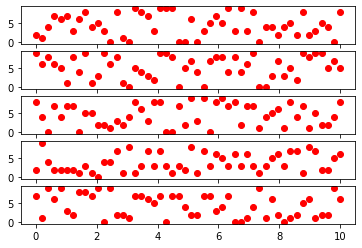

In [47]:
# multiple subplots
fig, axes = plt.subplots(nrows=5, ncols=1)

for idx in range(5):
    axes[idx].plot(np.linspace(start, stop, num_pts), np.random.randint(10, size=50), 'ro')

plt.show()

In [48]:
# let's make some bar graphs
df = sns.load_dataset('diamonds')
color_counts = df['color'].value_counts()
color_counts

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64